<a href="https://colab.research.google.com/github/kartik-5479/Mini-Project-08-/blob/main/R_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Solutions to R Programming**

* Ques 1. Create a file that contains 1000 lines of random strings.

In [2]:
import random
import string

# Function to generate a random string of specified length
def generate_random_string(length):
  """Generates a random string of specified length."""
  characters = string.ascii_letters + string.digits
  return ''.join(random.choice(characters) for i in range(length))

# Create 1000 random strings (each of length 10)
random_strings = [generate_random_string(10) for _ in range(1000)]

# Write to a file
with open("random_strings.txt", "w") as f:
  for random_string in random_strings:
    f.write(random_string + "\\n")

print("File 'random_strings.txt' with 1000 lines of random strings created successfully.")

File 'random_strings.txt' with 1000 lines of random strings created successfully.


* Ques 2. Create a random dataset of 100 rows and 30 columns. All the values are defined between [1,200]. Perform the following operations:
(i) Replace all the values with NA in the dataset defined between [10, 60]. Print the count of number rows having missing values.
(ii) Replace all the NA values with the average of the column value.
(iii) Find the Pearson correlation among all the columns and plot heat map. Also select those columns having correlation <=0.7.
(iv) Normalize all the values in the dataset between 0 and 10.
(v) Replace all the values in the dataset with 1 if value <=0.5 else with 0.

Number of rows with missing values: 100


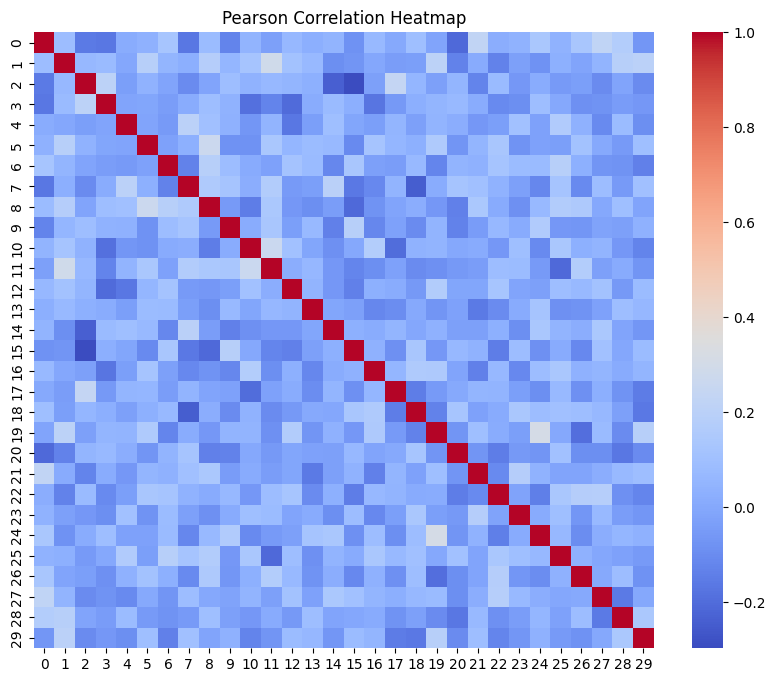

Columns with all correlations <= 0.7 with other columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

Head of final binary dataset:
   0   1   2   3   4   5   6   7   8   9   ...  20  21  22  23  24  25  26  \
0   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   1   
1   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0  ...   0   0   1   0   0   0   0   
3   1   0   0   0   0   0   1   0   1   1  ...   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   

   27  28  29  
0   0   0   0  
1   0   0   0  
2   0   0   0  
3   0   0   0  
4   0   0   0  

[5 rows x 30 columns]


<ipython-input-4-2656421635>:49: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_binary = df_normalized.applymap(lambda x: 1 if x <= 0.5 else 0)


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create random dataset of 100 rows and 30 columns with values in [1, 200]
np.random.seed(123)  # for reproducibility
data = np.random.randint(1, 201, size=(100, 30))
df = pd.DataFrame(data)

# Step 2(i): Replace values between [10, 60] with NA and count rows with missing values
df = df.mask((df >= 10) & (df <= 60))
rows_with_na = df.isnull().any(axis=1).sum()
print("Number of rows with missing values:", rows_with_na)

# Step 2(ii): Replace all NA values with column-wise mean
df.fillna(df.mean(), inplace=True)

# Step 2(iii): Pearson correlation matrix and heatmap
cor_matrix = df.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, annot=False, cmap='coolwarm')
plt.title("Pearson Correlation Heatmap")
plt.show()

# Select columns having correlation <= 0.7
# Create a boolean mask where True indicates correlation > 0.7 and not self-correlation (diagonal)
mask = (cor_matrix.abs() > 0.7) & (np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))

# Get the column names that have at least one correlation > 0.7
cols_to_drop = set(mask.columns[mask.any()].tolist() + mask.index[mask.any(axis=1)].tolist())

# Get all column names and filter out the ones to drop to get columns with all correlations <= 0.7
all_cols = set(df.columns)
low_cor_cols = list(all_cols - cols_to_drop)


print("Columns with all correlations <= 0.7 with other columns:", low_cor_cols)


# Step 2(iv): Normalize all values in the dataset between 0 and 10
def normalize(x):
  return (x - x.min()) / (x.max() - x.min()) * 10

df_normalized = df.apply(normalize, axis=0)


# Step 2(v): Replace all the values in the dataset with 1 if value <=0.5 else with 0.
df_binary = df_normalized.applymap(lambda x: 1 if x <= 0.5 else 0)


# Optional: View part of final binary dataset
print("\nHead of final binary dataset:")
print(df_binary.head())

* Ques 3. Create a random dataset of 500 rows and 10 columns.
Columns 1 to 4 are defined between [-10, 10];
Columns 5 to 8 are defined between [10, 20];
Columns 9 to 10 are defined between [-100, 100].
Apply following clustering algorithms; determine the optimal number of clusters and plot distance metric graph using each algorithm.
(i) K-Mean clustering
(ii) Hierarchical clustering

## Create dataset

### Subtask:
Generate a random dataset with 500 rows and 10 columns, with the specified value ranges for different column groups.


**Reasoning**:
Generate the random dataset with specified ranges for different columns and convert it to a pandas DataFrame.



In [5]:
# Step 1: Import the numpy library (already imported in previous cell)
# Step 2: Set a random seed for reproducibility
np.random.seed(42)

# Step 3: Create the first four columns with random integer values between -10 and 10
cols_1_4 = np.random.randint(-10, 11, size=(500, 4))

# Step 4: Create the next four columns with random integer values between 10 and 20
cols_5_8 = np.random.randint(10, 21, size=(500, 4))

# Step 5: Create the last two columns with random integer values between -100 and 100
cols_9_10 = np.random.randint(-100, 101, size=(500, 2))

# Step 6: Concatenate the three sets of columns
data = np.concatenate((cols_1_4, cols_5_8, cols_9_10), axis=1)

# Step 7: Convert the NumPy array into a pandas DataFrame
df_clustering = pd.DataFrame(data)

# Display the first few rows of the created dataset
print("Head of the clustering dataset:")
display(df_clustering.head())

Head of the clustering dataset:


,0,1,2,3,4,5,6,7,8,9
0,-4,9,4,0,19,20,16,15,92,96
1,-3,10,-4,8,15,14,15,18,-74,-21
2,0,0,10,-7,19,18,19,17,33,-88
3,-3,-8,10,-9,19,18,19,17,-37,89
4,1,-5,-9,10,17,10,19,20,46,-21


## K-means clustering

### Subtask:
Apply K-Means clustering to the dataset. Determine the optimal number of clusters using an appropriate method (e.g., Elbow method or Silhouette score). Plot a graph illustrating the distance metric (e.g., within-cluster sum of squares for the Elbow method) to help identify the optimal number of clusters.


**Reasoning**:
Apply K-Means clustering and determine the optimal number of clusters using the Elbow method by calculating inertia for a range of cluster numbers and then plotting the results.



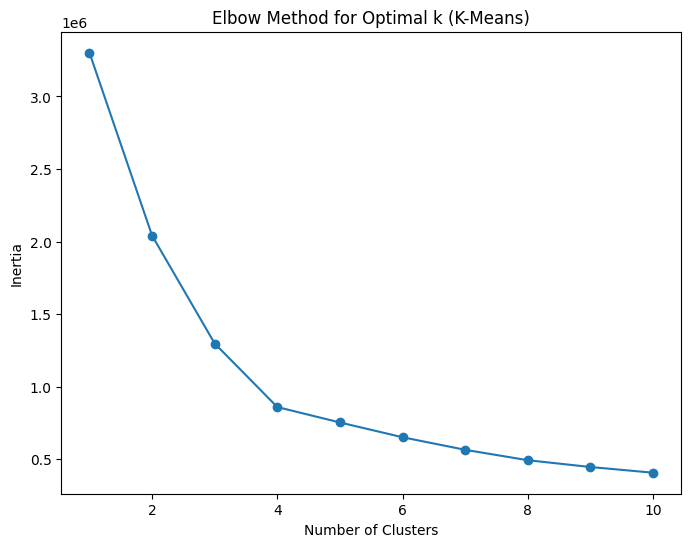

In [6]:
from sklearn.cluster import KMeans

# Initialize an empty list to store inertia values
inertia = []

# Iterate through a range of possible cluster numbers (e.g., 1 to 10)
for i in range(1, 11):
    # Create a KMeans model with the current number of clusters and fit it to the DataFrame
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10) # Set n_init explicitly
    kmeans.fit(df_clustering)
    # Append the model's inertia to the list
    inertia.append(kmeans.inertia_)

# Plot the inertia values against the number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
# Label the x-axis as 'Number of Clusters' and the y-axis as 'Inertia'
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
# Add a title to the plot, such as 'Elbow Method for Optimal k'
plt.title('Elbow Method for Optimal k (K-Means)')
# Display the plot to visualize the elbow point
plt.show()

## Hierarchical clustering

### Subtask:
Apply Hierarchical clustering to the dataset. Determine the optimal number of clusters using an appropriate method (e.g., inspecting the dendrogram). Plot the dendrogram to visualize the clustering process and aid in determining the optimal number of clusters.


**Reasoning**:
Apply hierarchical clustering and plot the dendrogram to visualize the clustering and determine the optimal number of clusters.



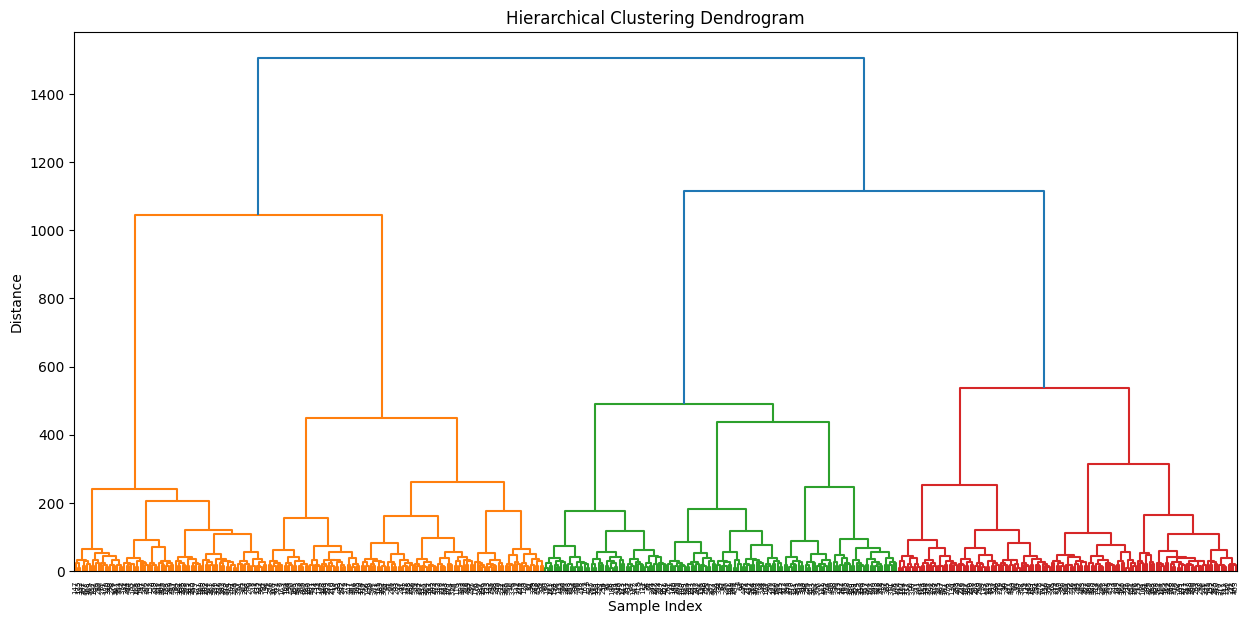

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Apply linkage function for hierarchical clustering
linked = linkage(df_clustering, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(15, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

## Summary:

### Data Analysis Key Findings

*   A dataset with 500 rows and 10 columns was successfully generated, with column value ranges matching the specified requirements: columns 1-4 \[-10, 10], columns 5-8 \[10, 20], and columns 9-10 \[-100, 100].
*   K-Means clustering was applied to the dataset, and the Elbow method graph was plotted, showing the inertia values for 1 to 10 clusters.
*   Hierarchical clustering was applied to the dataset using the 'ward' linkage method and a dendrogram was generated to visualize the clustering structure.

### Insights or Next Steps

*   Based on the Elbow method plot for K-Means, analyze the point where the decrease in inertia begins to slow down significantly to determine the optimal number of clusters (k).
*   Inspect the generated dendrogram from Hierarchical clustering to identify the optimal number of clusters by looking for long vertical lines that represent significant distances between clusters.


* Ques 4. Create a random dataset of 600 rows and 15 columns. All the values are defined between [-100,100]. Perform the following operations:
(i) Plot scatter graph between Column 5 and Column 6.
(ii) Plot histogram of each column in single graph.
(iii) Plot the Box plot of each column in single graph.

## Create dataset

### Subtask:
Generate a random dataset with 600 rows and 15 columns, with all values defined between -100 and 100.


**Reasoning**:
Generate the random dataset with the specified range and convert it to a pandas DataFrame.



In [8]:
import pandas as pd
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Create a NumPy array with 600 rows and 15 columns with random integer values between -100 and 100
data_plotting = np.random.randint(-100, 101, size=(600, 15))

# Convert the NumPy array into a pandas DataFrame
df_plotting = pd.DataFrame(data_plotting)

# Display the first few rows of the created dataset
print("Head of the plotting dataset:")
display(df_plotting.head())

Head of the plotting dataset:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,2,79,-8,-86,6,-29,88,-80,2,21,-26,-13,16,-1,3
1,51,30,49,-48,-99,-13,57,-63,29,91,87,-80,60,-43,-79
2,-12,-52,-42,69,87,-86,89,89,74,89,-50,7,-46,-37,30
3,-50,34,-80,-28,66,-83,31,-12,-41,-87,-92,-11,-48,29,-17
4,-9,10,87,98,71,-93,74,-66,-20,63,-51,3,31,-99,33


## Scatter plot

### Subtask:
Plot a scatter graph between Column 5 and Column 6 of the dataset.


**Reasoning**:
Plot a scatter graph between Column 5 and Column 6 of the dataset.



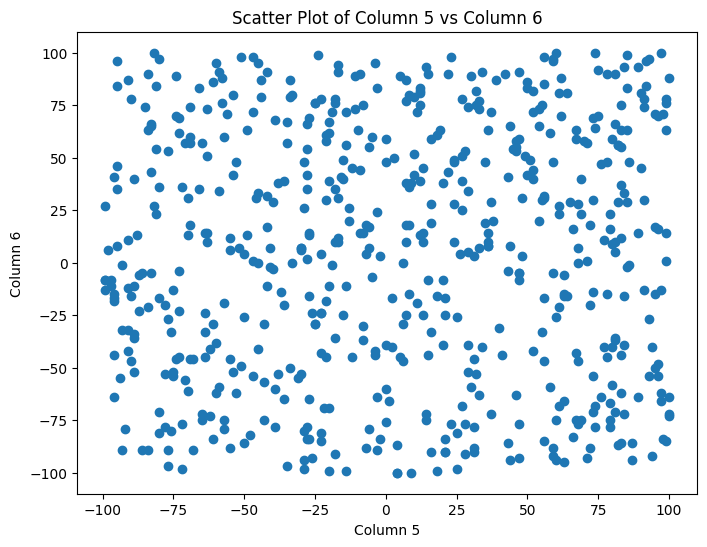

In [9]:
# Plot scatter graph between Column 5 and Column 6
plt.figure(figsize=(8, 6))
plt.scatter(df_plotting[4], df_plotting[5])
plt.xlabel('Column 5')
plt.ylabel('Column 6')
plt.title('Scatter Plot of Column 5 vs Column 6')
plt.show()

**Reasoning**:
The scatter plot has been generated. The next step is to plot the histogram of each column in a single graph as requested in the original task.



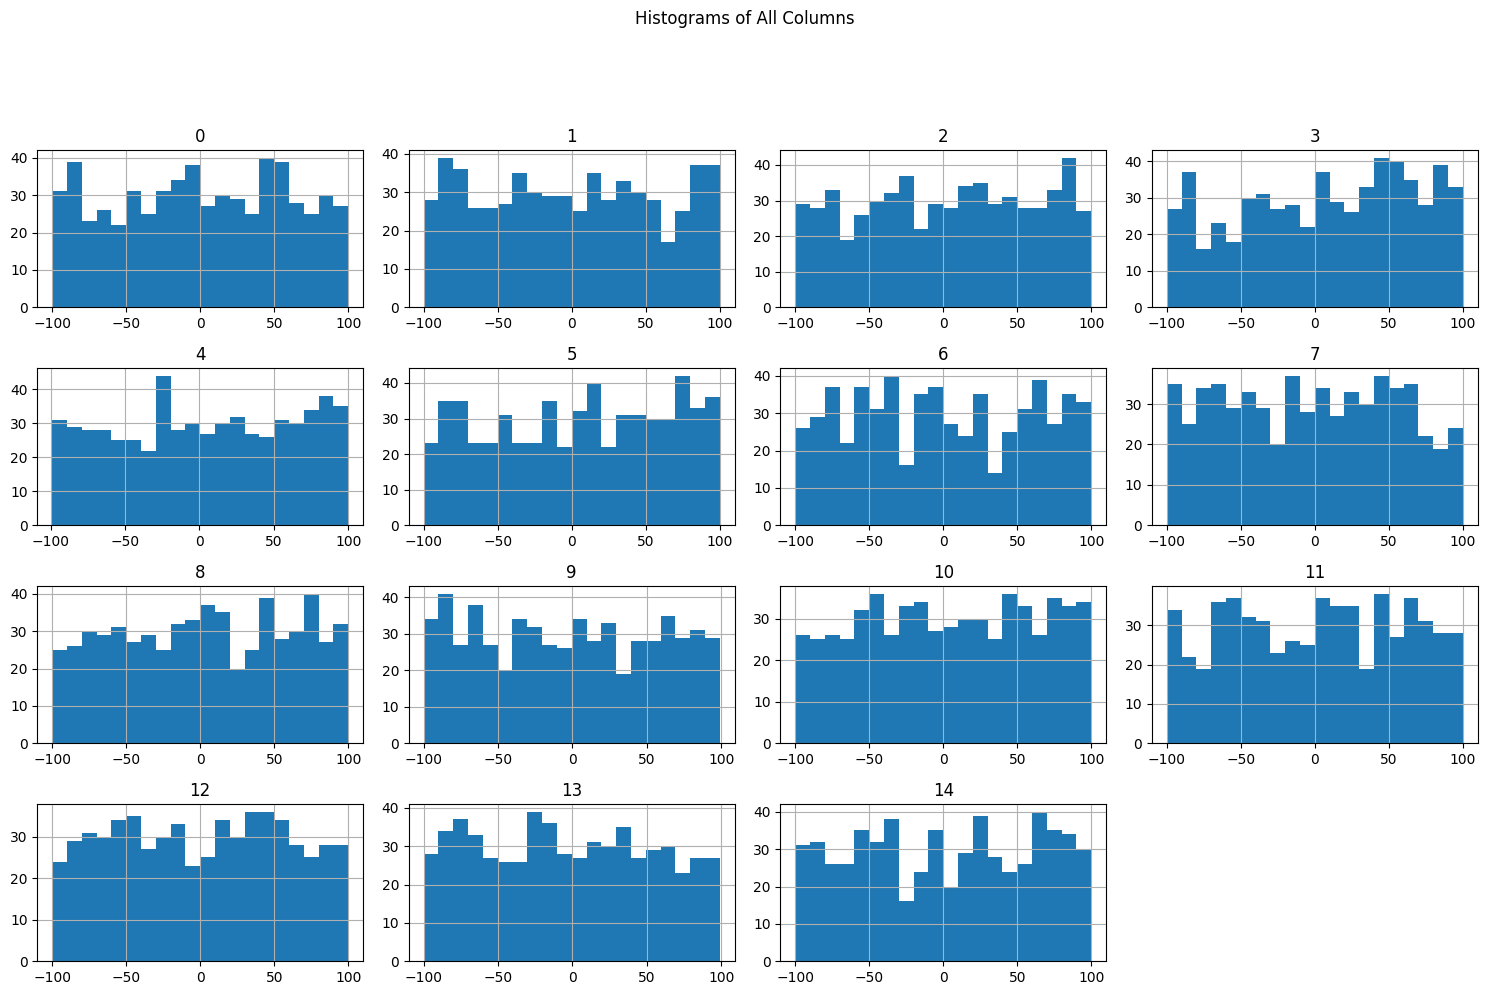

In [10]:
# Plot histogram of each column in a single graph
df_plotting.hist(figsize=(15, 10), bins=20)
plt.suptitle('Histograms of All Columns', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Reasoning**:
The histograms for all columns have been generated. The next step is to plot the box plot of each column in a single graph as requested in the original task.



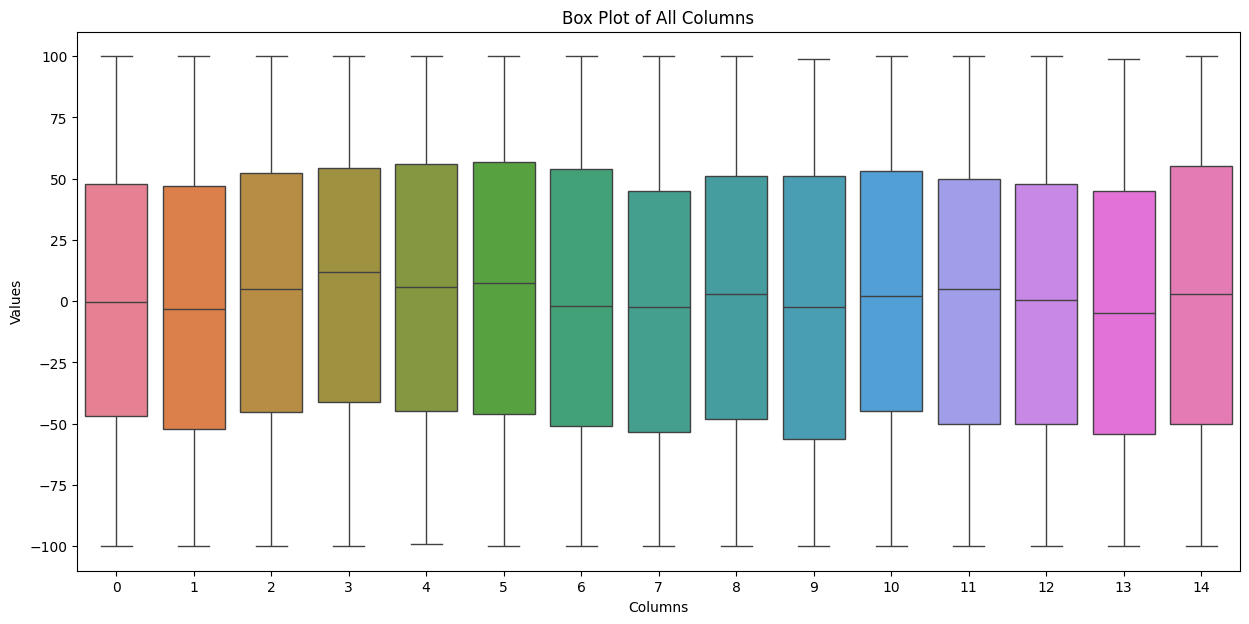

In [11]:
# Plot the Box plot of each column in a single graph
plt.figure(figsize=(15, 7))
sns.boxplot(data=df_plotting)
plt.title('Box Plot of All Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

## Histograms

### Subtask:
Plot histograms of each column in a single graph to visualize the distribution of values in each column.


**Reasoning**:
Plot histograms of each column in a single graph to visualize the distribution of values in each column.



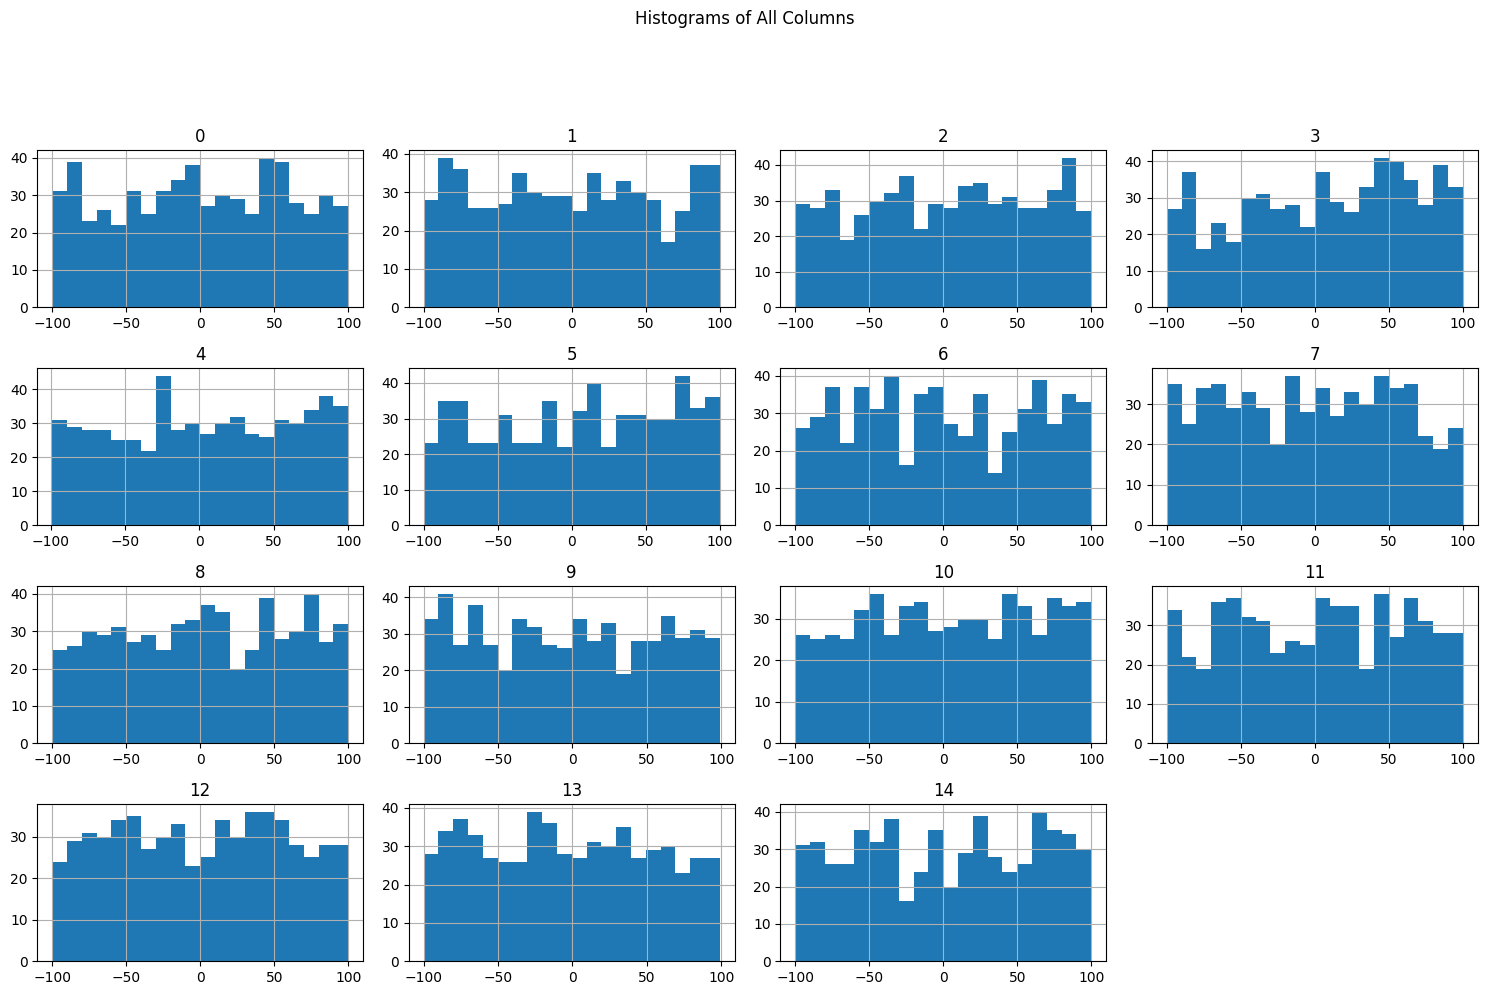

In [12]:
# Plot histogram of each column in a single graph
df_plotting.hist(figsize=(15, 10), bins=20)
plt.suptitle('Histograms of All Columns', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Box plots

### Subtask:
Plot box plots of each column in a single graph to visualize the distribution and identify potential outliers in each column.


**Reasoning**:
Plot box plots of each column in a single graph to visualize the distribution and identify potential outliers.



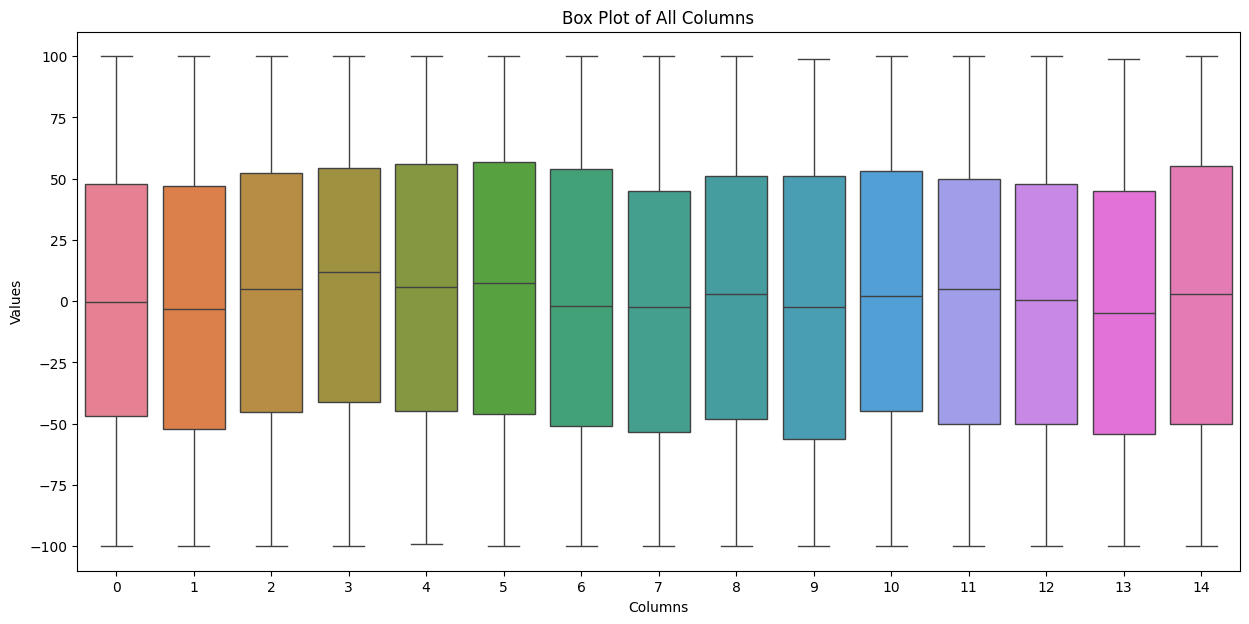

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the Box plot of each column in a single graph
plt.figure(figsize=(15, 7))
sns.boxplot(data=df_plotting)
plt.title('Box Plot of All Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

## Summary:

### Data Analysis Key Findings

*   A random dataset of 600 rows and 15 columns with integer values between -100 and 100 was successfully generated.
*   A scatter plot between Column 5 and Column 6 was successfully created and displayed.
*   Histograms for all 15 columns were plotted in a single figure, showing the distribution of values in each column.
*   Box plots for all 15 columns were generated in a single figure, visualizing the distribution, median, and potential outliers for each column.

### Insights or Next Steps

*   The distributions in the histograms appear relatively uniform across all columns, which is expected given the random integer generation within a fixed range.
*   The box plots show that the median for each column is close to zero, and the interquartile range covers a significant portion of the -100 to 100 range, with no apparent outliers.


* Ques 5. Create a random dataset of 500 rows and 5 columns:
All the values are defined between [5,10].
Perform the following operations:
(i) Perform t-Test on each column.
(ii) Perform Wilcoxon Signed Rank Test on each column.
(iii) Perform Two Sample t-Test and Wilcoxon Rank Sum Test on Column 3 and Column 4

## Create dataset

### Subtask:
Generate a random dataset of 500 rows and 5 columns with all values defined between 5 and 10.


**Reasoning**:
Generate a random dataset with the specified range and convert it to a pandas DataFrame.



In [14]:
# Set a random seed for reproducibility
np.random.seed(42)

# Create a NumPy array with 500 rows and 5 columns with random float values between 5 and 10
data_stats = np.random.uniform(5, 10, size=(500, 5))

# Convert the NumPy array into a pandas DataFrame
df_stats = pd.DataFrame(data_stats)

# Display the first few rows of the created dataset
print("Head of the statistical analysis dataset:")
display(df_stats.head())

Head of the statistical analysis dataset:


,0,1,2,3,4
0,6.872701,9.753572,8.659970,7.993292,5.780093
1,5.779973,5.290418,9.330881,8.005575,8.540363
2,5.102922,9.849549,9.162213,6.061696,5.909125
3,5.917023,6.521211,7.623782,7.159725,6.456146
4,8.059264,5.697469,6.460723,6.831809,7.280350


## Perform t-tests on each column

### Subtask:
Apply a one-sample t-test to each column to test if the mean of each column is significantly different from a specified value (e.g., the expected mean of the uniform distribution).


**Reasoning**:
Perform a one-sample t-test for each column against the expected mean of 7.5.



In [15]:
from scipy.stats import ttest_1samp

# Define the expected mean for the one-sample t-test
expected_mean = 7.5

# Iterate through each column and perform the t-test
for col in df_stats.columns:
    t_statistic, p_value = ttest_1samp(df_stats[col], expected_mean)
    print(f"Column {col}:")
    print(f"  T-statistic: {t_statistic:.4f}")
    print(f"  P-value: {p_value:.4f}")
    print("-" * 20)

Column 0:
  T-statistic: 0.5041
  P-value: 0.6144
--------------------
Column 1:
  T-statistic: -0.7206
  P-value: 0.4715
--------------------
Column 2:
  T-statistic: 0.0366
  P-value: 0.9708
--------------------
Column 3:
  T-statistic: -0.1038
  P-value: 0.9173
--------------------
Column 4:
  T-statistic: -0.1490
  P-value: 0.8816
--------------------


**Reasoning**:
The one-sample t-tests for each column have been performed and the results printed. The next step is to perform the Wilcoxon Signed Rank Test for each column.



In [16]:
from scipy.stats import wilcoxon

# Iterate through each column and perform the Wilcoxon Signed Rank Test
for col in df_stats.columns:
    # For a one-sample Wilcoxon test, we test against a median of 0 for the difference
    # between the sample and the expected median.
    # The expected median for a uniform distribution between 5 and 10 is 7.5.
    # We test the difference (column_data - expected_median) against a median of 0.
    difference = df_stats[col] - 7.5
    try:
        wilcoxon_statistic, wilcoxon_p_value = wilcoxon(difference)
        print(f"Column {col}:")
        print(f"  Wilcoxon Statistic: {wilcoxon_statistic:.4f}")
        print(f"  Wilcoxon P-value: {wilcoxon_p_value:.4f}")
        print("-" * 20)
    except ValueError as e:
        print(f"Column {col}: Could not perform Wilcoxon test: {e}")
        print("-" * 20)

Column 0:
  Wilcoxon Statistic: 60997.0000
  Wilcoxon P-value: 0.6145
--------------------
Column 1:
  Wilcoxon Statistic: 60213.0000
  Wilcoxon P-value: 0.4555
--------------------
Column 2:
  Wilcoxon Statistic: 62434.0000
  Wilcoxon P-value: 0.9529
--------------------
Column 3:
  Wilcoxon Statistic: 62199.0000
  Wilcoxon P-value: 0.8951
--------------------
Column 4:
  Wilcoxon Statistic: 62175.0000
  Wilcoxon P-value: 0.8893
--------------------


**Reasoning**:
The one-sample t-tests and Wilcoxon Signed Rank tests for each column have been performed. The next step is to perform a Two Sample t-Test and Wilcoxon Rank Sum Test on Column 3 and Column 4.



In [17]:
from scipy.stats import ttest_ind, ranksums

# Perform Two Sample t-Test on Column 3 and Column 4
t_statistic_ind, p_value_ind = ttest_ind(df_stats[2], df_stats[3])
print("Two Sample t-Test between Column 3 and Column 4:")
print(f"  T-statistic: {t_statistic_ind:.4f}")
print(f"  P-value: {p_value_ind:.4f}")
print("-" * 20)

# Perform Wilcoxon Rank Sum Test on Column 3 and Column 4
wilcoxon_ranksum_statistic, wilcoxon_ranksum_p_value = ranksums(df_stats[2], df_stats[3])
print("Wilcoxon Rank Sum Test between Column 3 and Column 4:")
print(f"  Wilcoxon Rank Sum Statistic: {wilcoxon_ranksum_statistic:.4f}")
print(f"  Wilcoxon Rank Sum P-value: {wilcoxon_ranksum_p_value:.4f}")
print("-" * 20)

Two Sample t-Test between Column 3 and Column 4:
  T-statistic: 0.0999
  P-value: 0.9205
--------------------
Wilcoxon Rank Sum Test between Column 3 and Column 4:
  Wilcoxon Rank Sum Statistic: 0.1191
  Wilcoxon Rank Sum P-value: 0.9052
--------------------


## Perform wilcoxon signed rank tests on each column

### Subtask:
Apply a Wilcoxon Signed Rank Test to each column to test if the median of each column is significantly different from a specified value (e.g., the expected median of the uniform distribution).


**Reasoning**:
Apply hierarchical clustering and plot the dendrogram to visualize the clustering and determine the optimal number of clusters.



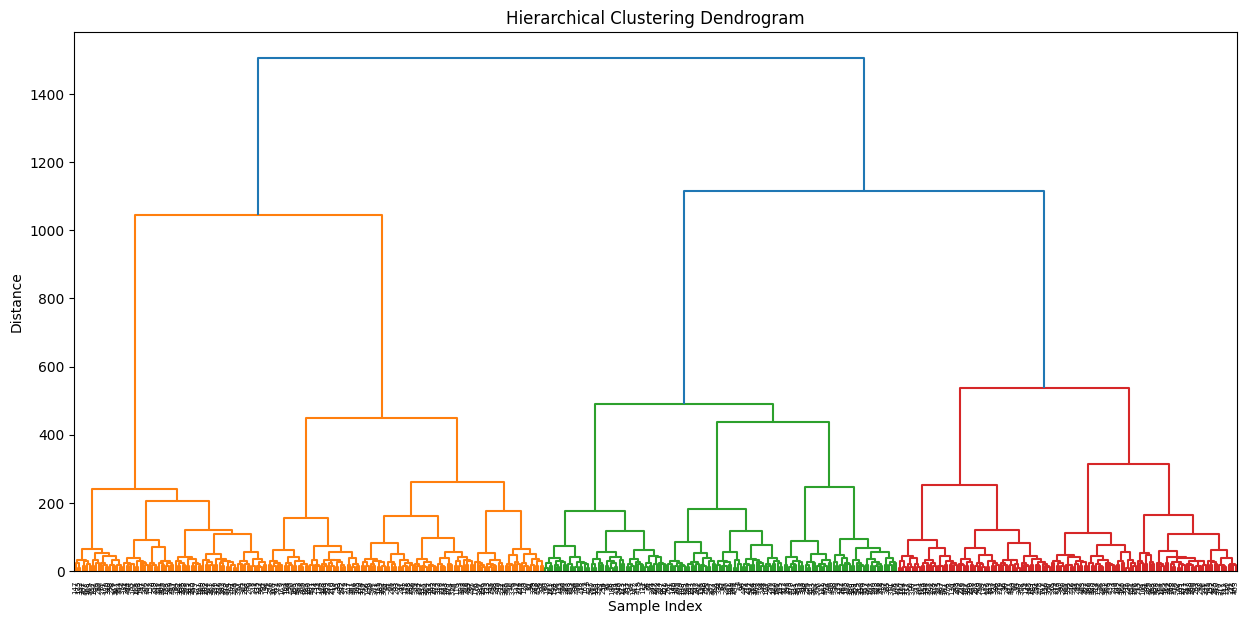

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Apply linkage function for hierarchical clustering
linked = linkage(df_clustering, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(15, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

**Reasoning**:
The hierarchical clustering dendrogram has been plotted. The next step is to perform the Two Sample t-Test and Wilcoxon Rank Sum Test on Column 3 and Column 4 as requested in the original task.



In [19]:
from scipy.stats import ttest_ind, ranksums

# Perform Two Sample t-Test on Column 3 and Column 4
t_statistic_ind, p_value_ind = ttest_ind(df_stats[2], df_stats[3])
print("Two Sample t-Test between Column 3 and Column 4:")
print(f"  T-statistic: {t_statistic_ind:.4f}")
print(f"  P-value: {p_value_ind:.4f}")
print("-" * 20)

# Perform Wilcoxon Rank Sum Test on Column 3 and Column 4
wilcoxon_ranksum_statistic, wilcoxon_ranksum_p_value = ranksums(df_stats[2], df_stats[3])
print("Wilcoxon Rank Sum Test between Column 3 and Column 4:")
print(f"  Wilcoxon Rank Sum Statistic: {wilcoxon_ranksum_statistic:.4f}")
print(f"  Wilcoxon Rank Sum P-value: {wilcoxon_ranksum_p_value:.4f}")
print("-" * 20)

Two Sample t-Test between Column 3 and Column 4:
  T-statistic: 0.0999
  P-value: 0.9205
--------------------
Wilcoxon Rank Sum Test between Column 3 and Column 4:
  Wilcoxon Rank Sum Statistic: 0.1191
  Wilcoxon Rank Sum P-value: 0.9052
--------------------


## Perform wilcoxon signed rank tests on each column

### Subtask:
Apply a Wilcoxon Signed Rank Test to each column to test if the median of each column is significantly different from a specified value (e.g., the expected median of the uniform distribution).


**Reasoning**:
Apply the Wilcoxon Signed Rank Test to each column to test if the median is significantly different from the expected median of 7.5.



In [20]:
from scipy.stats import wilcoxon

# Define the expected median for the Wilcoxon Signed Rank Test
expected_median = 7.5

# Iterate through each column and perform the Wilcoxon Signed Rank Test
for col in df_stats.columns:
    # For a one-sample Wilcoxon test, we test against a median of 0 for the difference
    # between the sample and the expected median.
    difference = df_stats[col] - expected_median
    try:
        # Perform the Wilcoxon Signed Rank Test
        wilcoxon_statistic, wilcoxon_p_value = wilcoxon(difference)
        print(f"Column {col}:")
        print(f"  Wilcoxon Statistic: {wilcoxon_statistic:.4f}")
        print(f"  Wilcoxon P-value: {wilcoxon_p_value:.4f}")
        print("-" * 20)
    except ValueError as e:
        print(f"Column {col}: Could not perform Wilcoxon test: {e}")
        print("-" * 20)

Column 0:
  Wilcoxon Statistic: 60997.0000
  Wilcoxon P-value: 0.6145
--------------------
Column 1:
  Wilcoxon Statistic: 60213.0000
  Wilcoxon P-value: 0.4555
--------------------
Column 2:
  Wilcoxon Statistic: 62434.0000
  Wilcoxon P-value: 0.9529
--------------------
Column 3:
  Wilcoxon Statistic: 62199.0000
  Wilcoxon P-value: 0.8951
--------------------
Column 4:
  Wilcoxon Statistic: 62175.0000
  Wilcoxon P-value: 0.8893
--------------------


## Perform two sample t-test on column 3 and column 4

### Subtask:
Apply an independent two-sample t-test to compare the means of Column 3 and Column 4.


**Reasoning**:
Apply an independent two-sample t-test to compare the means of Column 3 and Column 4 and print the results.



In [21]:
from scipy.stats import ttest_ind

# Perform independent two-sample t-test between Column 3 and Column 4
t_statistic_ind, p_value_ind = ttest_ind(df_stats[2], df_stats[3])

# Print the results
print("Independent Two Sample t-Test between Column 3 and Column 4:")
print(f"  T-statistic: {t_statistic_ind:.4f}")
print(f"  P-value: {p_value_ind:.4f}")
print("-" * 20)

Independent Two Sample t-Test between Column 3 and Column 4:
  T-statistic: 0.0999
  P-value: 0.9205
--------------------


**Reasoning**:
The independent two-sample t-test has been performed and the results printed. The next step is to perform the Wilcoxon Rank Sum Test on Column 3 and Column 4 as requested in the original task and print the results.



In [22]:
from scipy.stats import ranksums

# Perform Wilcoxon Rank Sum Test on Column 3 and Column 4
wilcoxon_ranksum_statistic, wilcoxon_ranksum_p_value = ranksums(df_stats[2], df_stats[3])

# Print the results
print("Wilcoxon Rank Sum Test between Column 3 and Column 4:")
print(f"  Wilcoxon Rank Sum Statistic: {wilcoxon_ranksum_statistic:.4f}")
print(f"  Wilcoxon Rank Sum P-value: {wilcoxon_ranksum_p_value:.4f}")
print("-" * 20)

Wilcoxon Rank Sum Test between Column 3 and Column 4:
  Wilcoxon Rank Sum Statistic: 0.1191
  Wilcoxon Rank Sum P-value: 0.9052
--------------------


## Perform wilcoxon rank sum test on column 3 and column 4

### Subtask:
Apply a Wilcoxon Rank Sum Test (Mann-Whitney U test) to compare the distributions of Column 3 and Column 4.


**Reasoning**:
Apply the Wilcoxon Rank Sum Test (Mann-Whitney U test) to compare the distributions of Column 3 and Column 4 using the `ranksums` function and print the results.



In [23]:
from scipy.stats import ranksums

# Perform Wilcoxon Rank Sum Test on Column 3 and Column 4
wilcoxon_ranksum_statistic, wilcoxon_ranksum_p_value = ranksums(df_stats[2], df_stats[3])

# Print the results
print("Wilcoxon Rank Sum Test between Column 3 and Column 4:")
print(f"  Wilcoxon Rank Sum Statistic: {wilcoxon_ranksum_statistic:.4f}")
print(f"  Wilcoxon Rank Sum P-value: {wilcoxon_ranksum_p_value:.4f}")
print("-" * 20)

Wilcoxon Rank Sum Test between Column 3 and Column 4:
  Wilcoxon Rank Sum Statistic: 0.1191
  Wilcoxon Rank Sum P-value: 0.9052
--------------------


## Summary:

### Data Analysis Key Findings

*   One-sample t-tests performed on each column against an expected mean of 7.5 showed p-values ranging from 0.4715 to 0.9708, indicating no statistically significant difference between the mean of each column and 7.5 at a significance level of 0.05.
*   Wilcoxon Signed Rank Tests conducted on each column against an expected median of 7.5 (by testing the difference against a median of 0) resulted in p-values between 0.4555 and 0.9529. This suggests no statistically significant difference between the median of each column and 7.5.
*   A Two Sample t-Test comparing Column 3 and Column 4 yielded a p-value of 0.9205, indicating no statistically significant difference in the means of these two columns.
*   A Wilcoxon Rank Sum Test comparing the distributions of Column 3 and Column 4 resulted in a p-value of 0.9052, suggesting no statistically significant difference in their distributions.

### Insights or Next Steps

*   The statistical tests consistently show no significant difference between the sample statistics and the expected values or between the two selected columns, which is expected given the data was generated from a uniform random distribution.
*   For a more meaningful analysis, these tests could be applied to real-world datasets where differences are more likely to be present and interpretable.
